# 2D Grid World - Loop Walker

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../packages")
import os
import numpy as np
import matplotlib.pyplot as plt
import gym
import collections

import floorplan
from learners.q_learning import QLearningLearner
from floorplan.envs.loopwalkergridworld import LoopWalkerGridWorldV1, LoopWalkerGridWorldV2
from learners.on_policiy_firstvisit_mc import OnPolicyFirstVisitMCCLearner

## Training customizations

Abort if accumulated reward falls below a certain treshhold -> this is nescessary because we can be trapped in loops if an undo-action becomes the greedy option. This problem occurs only while simulating greedy policys during training with $\epsilon = 0$.

# V1 - observe position only

Similar to the 1D case we want to investigate if we can converge to valid solutions even if the markov property is violated!

Set alpha = 1, using 4000 episodes

$\epsilon$ is linearly reduced from 1 to 0

trained for 4000 episodes each, linearly decr. epsiolon every 200 episodes


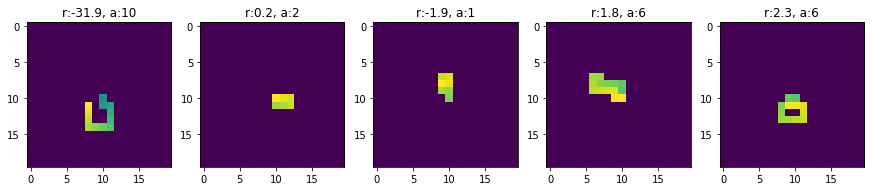

In [3]:
gridSize=20
targetArea=16
alpha = 1
gamma = 1
nExperiments = 5
decEpsilonBy = 0.05
decEpsilonEvery = 200
wallCost = 0.1
cornerCost = 0.4
failCost = 3
run = None #'_exp_test_27'
np.random.seed(23)
############################
print('trained for %i episodes each, linearly decr. epsiolon every %i episodes' % (decEpsilonEvery/decEpsilonBy, decEpsilonEvery))
fig, ax = plt.subplots(1,nExperiments, figsize=(15,5))
for _ in range(nExperiments):
    env = LoopWalkerGridWorldV1()
    env.setup(h=gridSize,w=gridSize,a=targetArea,wallCost=wallCost, cornerCost=cornerCost, failCost=failCost)
    learner = QLearningLearner(env)
    _run = run + '_' + str(_) if not run is None else None
    learner.train(epsilon=1000, alpha=1000, gamma=1000, nEpisodes=0, reset=True, run=_run)
    epsilon = 1
    while epsilon >= 0:
        learner.train(epsilon=epsilon, alpha=alpha, gamma=gamma, nEpisodes=decEpsilonEvery, statsEveryNEpisodes=10, nGreedySim=10, abortIf=-30, reset=False, run=_run)
        epsilon -= decEpsilonBy
    greedyReward = learner.runEpisode(0.0, abortIf=-30)
    ax[_].imshow(learner.env.render())
    ax[_].set_title('r:%.1f, a:%d' % (greedyReward, learner.env._polyArea()))
    sys.stdout.write('\rProgress: %i' % (_))
sys.stdout.write("\r\033[K")

### Reduce alpha due to noise introduced by the violated markov property
Setting alpha = 0.1 because the missing information turns environment into a non-deterministic one.

trained for 4000 episodes each, linearly decr. epsiolon every 200 episodes


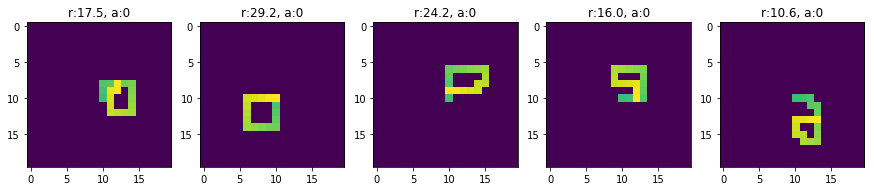

In [3]:
gridSize=20
targetArea=16
alpha = 0.1
gamma = 1
nExperiments = 5
decEpsilonBy = 0.05
decEpsilonEvery = 200
wallCost = 0.1
cornerCost = 0.4
failCost = 3
run = None #'_exp_test_27'
np.random.seed(23)
############################
print('trained for %i episodes each, linearly decr. epsiolon every %i episodes' % (decEpsilonEvery/decEpsilonBy, decEpsilonEvery))
fig, ax = plt.subplots(1,nExperiments, figsize=(15,5))
for _ in range(nExperiments):
    env = LoopWalkerGridWorldV1()
    env.setup(h=gridSize,w=gridSize,a=targetArea,wallCost=wallCost, cornerCost=cornerCost, failCost=failCost)
    learner = QLearningLearner(env)
    _run = run + '_' + str(_) if not run is None else None
    learner.train(epsilon=1000, alpha=1000, gamma=1000, nEpisodes=0, reset=True, run=_run)
    epsilon = 1
    while epsilon >= 0:
        learner.train(epsilon=epsilon, alpha=alpha, gamma=gamma, nEpisodes=decEpsilonEvery, statsEveryNEpisodes=10, nGreedySim=10, abortIf=-30, reset=False, run=_run)
        epsilon -= decEpsilonBy
    greedyReward = learner.runEpisode(0.0, abortIf=-30)
    ax[_].imshow(learner.env.render())
    ax[_].set_title('r:%.1f, a:%d' % (greedyReward, learner.env._polyArea()))
    sys.stdout.write('\rProgress: %i' % (_))
sys.stdout.write("\r\033[K")

### Scaling the environment and target area

trained for 4000 episodes each, linearly decr. epsiolon every 200 episodes


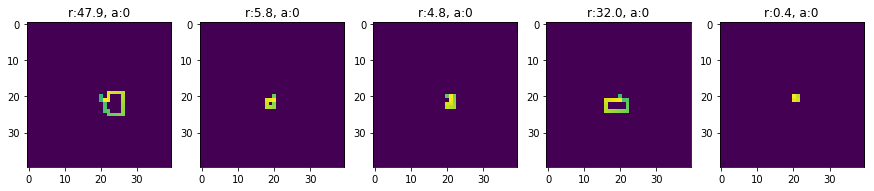

In [4]:
gridSize=40
targetArea=30
alpha = 0.1
gamma = 1
nExperiments = 5
decEpsilonBy = 0.05
decEpsilonEvery = 200
wallCost = 0.1
cornerCost = 0.4
failCost = 3
run = None #'_exp_test_27'
np.random.seed(23)
############################
print('trained for %i episodes each, linearly decr. epsiolon every %i episodes' % (decEpsilonEvery/decEpsilonBy, decEpsilonEvery))
fig, ax = plt.subplots(1,nExperiments, figsize=(15,5))
for _ in range(nExperiments):
    env = LoopWalkerGridWorldV1()
    env.setup(h=gridSize,w=gridSize,a=targetArea,wallCost=wallCost, cornerCost=cornerCost, failCost=failCost)
    learner = QLearningLearner(env)
    _run = run + '_' + str(_) if not run is None else None
    learner.train(epsilon=1000, alpha=1000, gamma=1000, nEpisodes=0, reset=True, run=_run)
    epsilon = 1
    while epsilon >= 0:
        learner.train(epsilon=epsilon, alpha=alpha, gamma=gamma, nEpisodes=decEpsilonEvery, statsEveryNEpisodes=10, nGreedySim=10, abortIf=-30, reset=False, run=_run)
        epsilon -= decEpsilonBy
    greedyReward = learner.runEpisode(0.0, abortIf=-30)
    ax[_].imshow(learner.env.render())
    ax[_].set_title('r:%.1f, a:%d' % (greedyReward, learner.env._polyArea()))
    sys.stdout.write('\rProgress: %i' % (_))
sys.stdout.write("\r\033[K")

# V2 - Observe position and canvas

alpha = 1 again as we have much less stochasticity now. Of course due to bootstrapping there is still randomness, but should be much less. If training becomes unstable we might still decrase alpha.

trained for 5000 episodes each, linearly decr. epsiolon every 200 episodes


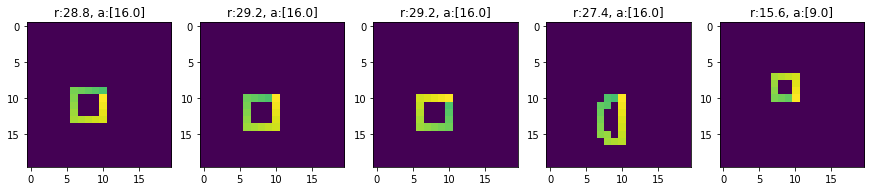

In [29]:
gridSize=20
targetArea=16
alpha = 1
gamma = 1
nExperiments = 5
decEpsilonBy = 0.04
decEpsilonEvery = 200
wallCost = 0.1
cornerCost = 0.4
failCost = 3
run = None #'_exp_test_27'
np.random.seed(23)
############################
print('trained for %i episodes each, linearly decr. epsiolon every %i episodes' % (decEpsilonEvery/decEpsilonBy, decEpsilonEvery))
fig, ax = plt.subplots(1,np.max([nExperiments,2]), figsize=(15,5))
for _ in range(nExperiments):
    env = LoopWalkerGridWorldV2()
    env.setup(h=gridSize,w=gridSize,a=targetArea,wallCost=wallCost, cornerCost=cornerCost, failCost=failCost)
    learner = QLearningLearner(env)
    _run = run + '_' + str(_) if not run is None else None
    learner.train(epsilon=1000, alpha=1000, gamma=1000, nEpisodes=0, reset=True, run=_run)
    epsilon = 1
    while epsilon >= 0:
        learner.train(epsilon=epsilon, alpha=alpha, gamma=gamma, nEpisodes=decEpsilonEvery, statsEveryNEpisodes=10, nGreedySim=10, abortIf=-30, reset=False, run=_run)
        epsilon -= decEpsilonBy
    greedyReward = learner.runEpisode(0.0, abortIf=-30)
    ax[_].imshow(learner.env.render())
    ax[_].set_title('r:%.1f, a:%s' % (greedyReward, learner.env._areas))
    sys.stdout.write('\rProgress: %i' % (_))
sys.stdout.write("\r\033[K")

With the gained additional information it seems to work better. Average rewrad is clearly better than v1 with alpha 1 and also better than v1 with alpha = 0.1. No further hyperparam-optimization (for alpha and others) has been done to compare the two setups and strengthen the claim of more information being better. For the moment we consider the results as a hint that we move in the right direction.

The reason that figure 2 has a better accumulated reward than figure 1 is due to the fact that in figure 1 four corners had to be drawn because we started on a straight segment. This is again a typical unwantd bias introduced by a misleading corner case in the reward-function. To preserve comparability we do not fix this issue for the moment. It should not have a big influence on the overall results, nevertheless its worth mentioning.

### comparing to alpha = 0.1

trained for 5000 episodes each, linearly decr. epsiolon every 200 episodes


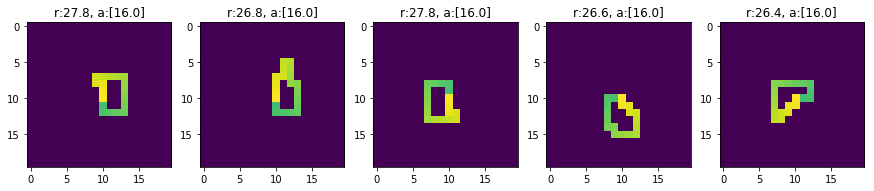

In [33]:
gridSize=20
targetArea=16
alpha = 0.1
gamma = 1
nExperiments = 5
decEpsilonBy = 0.04
decEpsilonEvery = 200
wallCost = 0.1
cornerCost = 0.4
failCost = 3
run = None #'_exp_test_27'
np.random.seed(23)
############################
print('trained for %i episodes each, linearly decr. epsiolon every %i episodes' % (decEpsilonEvery/decEpsilonBy, decEpsilonEvery))
fig, ax = plt.subplots(1,nExperiments, figsize=(15,5))
for _ in range(nExperiments):
    env = LoopWalkerGridWorldV2()
    env.setup(h=gridSize,w=gridSize,a=targetArea,wallCost=wallCost, cornerCost=cornerCost, failCost=failCost)
    learner = QLearningLearner(env)
    _run = run + '_' + str(_) if not run is None else None
    learner.train(epsilon=1000, alpha=1000, gamma=1000, nEpisodes=0, reset=True, run=_run)
    epsilon = 1
    while epsilon >= 0:
        learner.train(epsilon=epsilon, alpha=alpha, gamma=gamma, nEpisodes=decEpsilonEvery, statsEveryNEpisodes=10, nGreedySim=10, abortIf=-30, reset=False, run=_run)
        epsilon -= decEpsilonBy
    greedyReward = learner.runEpisode(0.0, abortIf=-30)
    ax[_].imshow(learner.env.render())
    ax[_].set_title('r:%.1f, a:%s' % (greedyReward, learner.env._areas))
    sys.stdout.write('\rProgress: %i' % (_))
sys.stdout.write("\r\033[K")

Results seem slightly worse. We expect the chosen alpha (which can be interpreted as learining rate) is too low (requiring the training time to be increased). An opitmal value might be somewhere between 0.1 and 1. Altough the hypotheses that we can use a higher alpha than in v1 could be right (nothing against it so far)

### Scale environment and target area function

trained for 5000 episodes each, linearly decr. epsiolon every 200 episodes


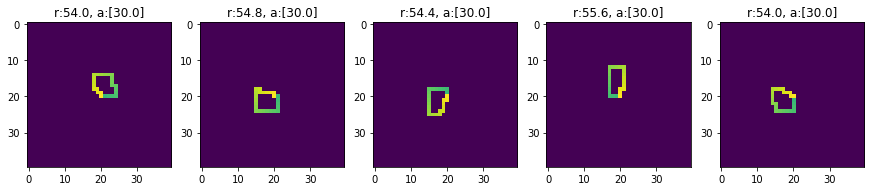

In [26]:
gridSize=40
targetArea=30
alpha = 0.9
gamma = 1
nExperiments = 5
decEpsilonBy = 0.04
decEpsilonEvery = 200
wallCost = 0.1
cornerCost = 0.4
failCost = 3
run = None #'_exp_test_27'
np.random.seed(23)
############################
print('trained for %i episodes each, linearly decr. epsiolon every %i episodes' % (decEpsilonEvery/decEpsilonBy, decEpsilonEvery))
fig, ax = plt.subplots(1,nExperiments, figsize=(15,5))
for _ in range(nExperiments):
    env = LoopWalkerGridWorldV2()
    env.setup(h=gridSize,w=gridSize,a=targetArea,wallCost=wallCost, cornerCost=cornerCost, failCost=failCost)
    learner = QLearningLearner(env)
    _run = run + '_' + str(_) if not run is None else None
    learner.train(epsilon=1000, alpha=1000, gamma=1000, nEpisodes=0, reset=True, run=_run)
    epsilon = 1
    while epsilon >= 0:
        learner.train(epsilon=epsilon, alpha=alpha, gamma=gamma, nEpisodes=decEpsilonEvery, statsEveryNEpisodes=10, nGreedySim=10, abortIf=-30, reset=False, run=_run)
        epsilon -= decEpsilonBy
    greedyReward = learner.runEpisode(0.0, abortIf=-30)
    ax[_].imshow(learner.env.render())
    ax[_].set_title('r:%.1f, a:%s' % (greedyReward, learner.env._areas))
    sys.stdout.write('\rProgress: %i' % (_))
sys.stdout.write("\r\033[K")

With a = 30 still most (here 5 of 5) of the experiments converge withing 5000 episodes to a greedy policy that produces an (at least) valid solution.

trained for 6666 episodes each, linearly decr. epsiolon every 200 episodes


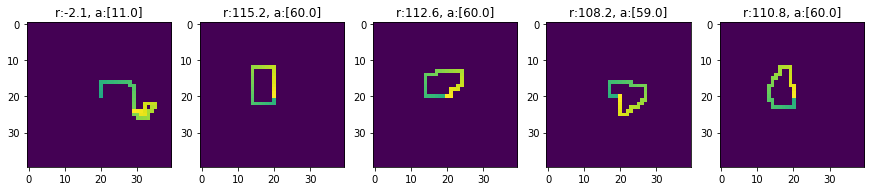

In [30]:
gridSize=40
targetArea=60
alpha = 0.9
gamma = 1
nExperiments = 5
decEpsilonBy = 0.03
decEpsilonEvery = 200
wallCost = 0.1
cornerCost = 0.4
failCost = 3
run = None #'_exp_test_27'
np.random.seed(23)
############################
print('trained for %i episodes each, linearly decr. epsiolon every %i episodes' % (decEpsilonEvery/decEpsilonBy, decEpsilonEvery))
fig, ax = plt.subplots(1,nExperiments, figsize=(15,5))
for _ in range(nExperiments):
    env = LoopWalkerGridWorldV2()
    env.setup(h=gridSize,w=gridSize,a=targetArea,wallCost=wallCost, cornerCost=cornerCost, failCost=failCost)
    learner = QLearningLearner(env)
    _run = run + '_' + str(_) if not run is None else None
    learner.train(epsilon=1000, alpha=1000, gamma=1000, nEpisodes=0, reset=True, run=_run)
    epsilon = 1
    while epsilon >= 0:
        learner.train(epsilon=epsilon, alpha=alpha, gamma=gamma, nEpisodes=decEpsilonEvery, statsEveryNEpisodes=10, nGreedySim=10, abortIf=-30, reset=False, run=_run)
        epsilon -= decEpsilonBy
    greedyReward = learner.runEpisode(0.0, abortIf=-30)
    ax[_].imshow(learner.env.render())
    ax[_].set_title('r:%.1f, a:%s' % (greedyReward, learner.env._areas))
    sys.stdout.write('\rProgress: %i' % (_))
sys.stdout.write("\r\033[K")

Even for a = 60 we converge quite reliably to a good soltuion within 6'666 episodes

# Tuning reward parameters

The values for the penaltys (wall, corner, fail) were chosen quite arbitraly at the beginning. Now we check what happens if we increase the cost for a corner (putting more weight on the user-requirement that rooms with lots of corners are less useful)

trained for 5000 episodes each, linearly decr. epsiolon every 200 episodes


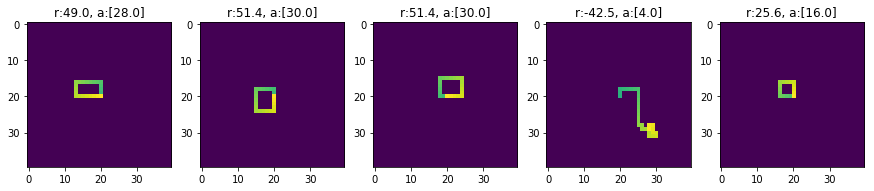

In [31]:
gridSize=40
targetArea=30
alpha = 0.9
gamma = 1
nExperiments = 5
decEpsilonBy = 0.04
decEpsilonEvery = 200
wallCost = 0.1
cornerCost = 0.4 * 4 ############ NEW
failCost = 3
run = None #'_exp_test_27'
np.random.seed(23)
############################
print('trained for %i episodes each, linearly decr. epsiolon every %i episodes' % (decEpsilonEvery/decEpsilonBy, decEpsilonEvery))
fig, ax = plt.subplots(1,nExperiments, figsize=(15,5))
for _ in range(nExperiments):
    env = LoopWalkerGridWorldV2()
    env.setup(h=gridSize,w=gridSize,a=targetArea,wallCost=wallCost, cornerCost=cornerCost, failCost=failCost)
    learner = QLearningLearner(env)
    _run = run + '_' + str(_) if not run is None else None
    learner.train(epsilon=1000, alpha=1000, gamma=1000, nEpisodes=0, reset=True, run=_run)
    epsilon = 1
    while epsilon >= 0:
        learner.train(epsilon=epsilon, alpha=alpha, gamma=gamma, nEpisodes=decEpsilonEvery, statsEveryNEpisodes=10, nGreedySim=10, abortIf=-30, reset=False, run=_run)
        epsilon -= decEpsilonBy
    greedyReward = learner.runEpisode(0.0, abortIf=-30)
    ax[_].imshow(learner.env.render())
    ax[_].set_title('r:%.1f, a:%s' % (greedyReward, learner.env._areas))
    sys.stdout.write('\rProgress: %i' % (_))
sys.stdout.write("\r\033[K")

The learner now clearly focuses on solutions with less corners, resulting in more common rectangular rooms. This indicates that by tuning this parameters of our reward function we can put focus on different aspects of the optimal solution.

### Balancing reward parameters

But lets look on an other consequence of the chosen parameters: In this setting drawing a corner results in a cost of 4 * 0.4 = 1.6, while getting 1 m^2 closer to the targetArea rewards only by 1. Therefore it should not be beneficial for an agent to draw 29 m^2 with 5 corners than drawing 30 or 28 m^2 polygon with 4 corners. The following results support this hypotheses.

trained for 5000 episodes each, linearly decr. epsiolon every 200 episodes


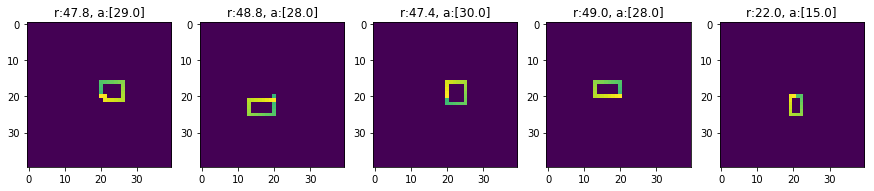

In [36]:
gridSize=40
targetArea=29
alpha = 0.9
gamma = 1
nExperiments = 5
decEpsilonBy = 0.04
decEpsilonEvery = 200
wallCost = 0.1
cornerCost = 0.4 * 4 ############ NEW
failCost = 3
run = None #'_exp_test_27'
np.random.seed(23)
############################
print('trained for %i episodes each, linearly decr. epsiolon every %i episodes' % (decEpsilonEvery/decEpsilonBy, decEpsilonEvery))
fig, ax = plt.subplots(1,nExperiments, figsize=(15,5))
for _ in range(nExperiments):
    env = LoopWalkerGridWorldV2()
    env.setup(h=gridSize,w=gridSize,a=targetArea,wallCost=wallCost, cornerCost=cornerCost, failCost=failCost)
    learner = QLearningLearner(env)
    _run = run + '_' + str(_) if not run is None else None
    learner.train(epsilon=1000, alpha=1000, gamma=1000, nEpisodes=0, reset=True, run=_run)
    epsilon = 1
    while epsilon >= 0:
        learner.train(epsilon=epsilon, alpha=alpha, gamma=gamma, nEpisodes=decEpsilonEvery, statsEveryNEpisodes=10, nGreedySim=10, abortIf=-30, reset=False, run=_run)
        epsilon -= decEpsilonBy
    greedyReward = learner.runEpisode(0.0, abortIf=-30)
    ax[_].imshow(learner.env.render())
    ax[_].set_title('r:%.1f, a:%s' % (greedyReward, learner.env._areas))
    sys.stdout.write('\rProgress: %i' % (_))
sys.stdout.write("\r\033[K")